In [ ]:
!pip install -U tensorflow

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

ImportError: DLL load failed while importing _errors: The specified procedure could not be found.

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2205 - accuracy: 0.9339
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0888 - accuracy: 0.9729
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0598 - accuracy: 0.9811


In [27]:
accuracy, loss = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9697
0.09295738488435745
0.9696999788284302


In [28]:
#model.save('digits.model')

The result is probably: 3


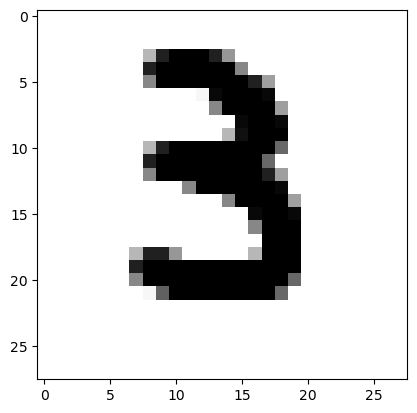

The result is probably: 9


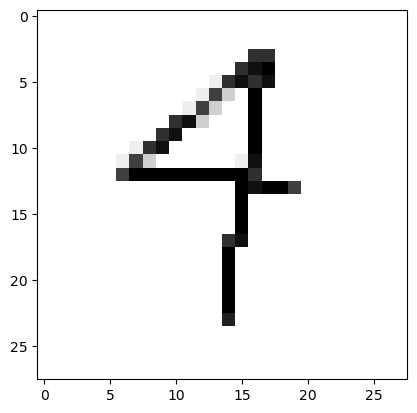

The result is probably: 6


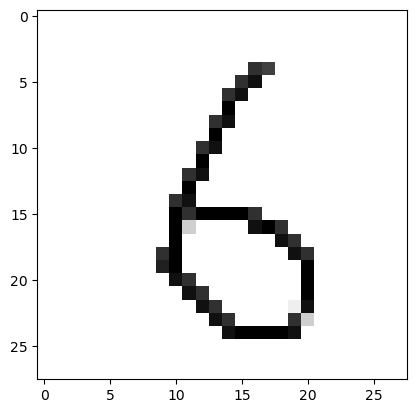

The result is probably: 5


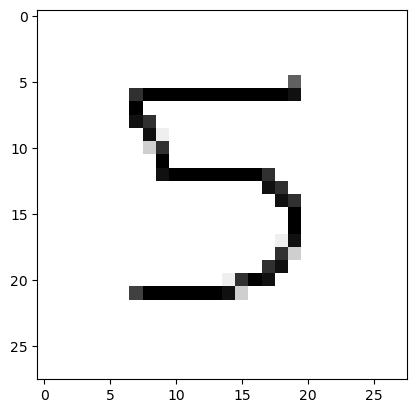

The result is probably: 7


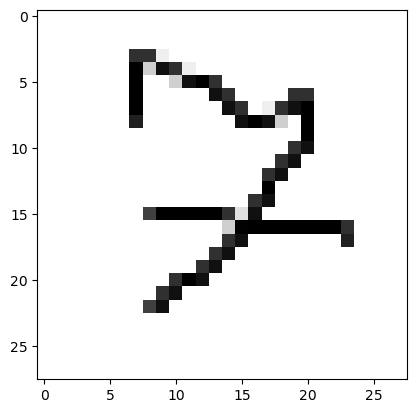

In [29]:
for x in range(1,6):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'The result is probably: {np.argmax(prediction)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()